In [1]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 700

# Starting with Qiskit and Quantum Information
## About classical information:
Classical information:
- Deterministic operations
- Probabilistic operations (Stochastic Matrices)
## About notation:
In this course we will use the dirac notation to describe physical states. Lets take a look at a q-bit or qubit representation using Dirac notation:

A qubit may be represented as the sum of the state 0 and the state 1. See the example: $$ | a \rangle = \alpha | 0 \rangle + \beta | 1 \rangle $$ Where $\alpha, \beta \in \mathbb{C}$ and $|a|^2 + |b|^2 = 1$ and $$| 0 \rangle = \left( \begin{matrix} 1 \\ 0 \end{matrix}\right), \  |1 \rangle = \left(\begin{matrix} 0 \\ 1 \end{matrix} \right)$$

To start ours work on quantum information, look at kets and matrices notations in python

In [2]:
import numpy as np
from qiskit.visualization import array_to_latex
ket_0 = np.array([[1], [0]])
ket_1 = np.array([[0], [1]])

display(array_to_latex(ket_0, prefix="|0\\rangle = "))
display(array_to_latex(ket_1, prefix="|1\\rangle = "))


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

## About Notation and Quantum States Representation

There still the 'bra' from dirac notation. 'Bra' is the conjugate-transpose vector of 'ket', see right below its representation: $$\langle 0 | = \left(\begin{matrix} 1 & 0 \end{matrix}\right)\, \langle 1 | = \left(\begin{matrix} 0 & 1 \end{matrix}\right)$$ This example is simple so lets explore a more complex one: 

Let $\psi$ be our quantum state of a qubit which its coefficients are: $$| \psi \rangle = \frac{1 + 2i}{3} | 0 \rangle - \frac{2}{3} | 1 \rangle$$ With $\psi$ defined we can se its 'bra' representation: $$\langle \psi | = \frac{1 - 2i}{3}\langle 0 | - \frac{2}{3}\langle 1 |$$

Next, we will focus on some common quantum states and some properties of dirac notation, such as inner product.

In [ ]:
psi = (1 + 2j)/3 * ket_0 - 2/3 * ket_1
display(array_to_latex(ket_0.conj().T, prefix="\\langle 0| = "))
display(array_to_latex( ket_1.conj().T, prefix="\\langle 1| = ")) 
display(array_to_latex(psi, prefix="|\\psi\\rangle = "))
display(array_to_latex(psi.conj().T, prefix="\\langle\\psi| = "))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [4]:
# Let us verify that psi state is normalized
print(np.vdot(psi, psi))  # should be 1

(1+0j)


## Common Quantum States:
In this section, we will just define some others common quantum states used in quantum computing. We will not focus on discussing its utilities.

Without delay:
- $| + \rangle$: $$| + \rangle = \frac{1}{\sqrt{2}}| 0 \rangle + \frac{1}{\sqrt{2}}| 1 \rangle$$
- $| - \rangle$: $$| - \rangle = \frac{1}{\sqrt{2}}| 0 \rangle - \frac{1}{\sqrt{2}}| 1 \rangle$$

## Properties of Dirac Notation:

The inner product of two vectors give us the probability of a certain state coming out. And it is given by: $$\text{Pr}(\text{outcome is 0}) = |\langle 0 | + \rangle |^2 = \left|\frac{1}{\sqrt{2}}\right|^2 = \frac{1}{2} \\ \text{Pr}(\text{outcome is 1}) = |\langle 1 | + \rangle |^2 = \left|\frac{1}{\sqrt{2}}\right|^2 = \frac{1}{2}$$ 

Lets use our example $\psi$:
$$\text{Pr}(\text{outcome is 0}) = |\langle 0 | \psi \rangle |^2 = \left|\frac{1 + 2i}{3}\right|^2 = \frac{5}{9} \\ \text{Pr}(\text{outcome is 1}) = |\langle 1 | \psi \rangle |^2 = \left|-\frac{2}{3}\right|^2 = \frac{4}{9}$$

## So... What are the differences between classical and quantum operations?

So far in the course we saw that in classical states we can perform probabilistic operations using stochastic matrices, however we perform operations on quantum states via unitary matrices. Before we continue, we shall recall what unitary matrices are:

Assume $\mathbb{U}$ a square matrix with complex entries. It is unitary only if it satisfies the equations:
$$ UU^\dag = \mathbb{I} \\ U^\dag U = \mathbb{I} $$ Where $$U^\dag = \overline{U^T}$$ which is the conjugate of the transposed matrix $U$, 

> Note: $U^{-1} = U^\dag$. 
> $\mathbb{I}$ is the identity matrix
>> All of this is only valid if the matrix $U$ is square! There may be a not square matrix $M$ where $M^\dag M = \mathbb{I}$, but $MM^\dag \neq \mathbb{I}$

## Some qiskit implementation from lesson 1

In [5]:
from qiskit.quantum_info import Statevector

u = Statevector([1 / np.sqrt(2), 1 / np.sqrt(2)])
psi_qiskit = Statevector(psi)
w = Statevector([1/3, 2/3])


In [6]:
display(u.draw("text"))
display(u.draw("latex"))
print(u.draw("latex_source"))

[0.70710678+0.j,0.70710678+0.j]

<IPython.core.display.Latex object>

\frac{\sqrt{2}}{2} |0\rangle+\frac{\sqrt{2}}{2} |1\rangle


In [7]:
# let us verify if all the states are valid
print(u.is_valid())
print(psi_qiskit.is_valid())
print(w.is_valid())

# See that seeing the normalization condition w is not a valid state

True
True
False


In [8]:
# From here we will simulate measuring the states

display(psi_qiskit.draw("latex"))

<IPython.core.display.Latex object>

In [9]:
outcome, state = psi_qiskit.measure()
print("Outcome:", outcome)
print("State after measurement:", state)
display(state.draw("latex"))

Outcome: 1
State after measurement: Statevector([ 0.+0.j, -1.+0.j],
            dims=(2,))


<IPython.core.display.Latex object>

{np.str_('0'): np.int64(55466), np.str_('1'): np.int64(44534)}


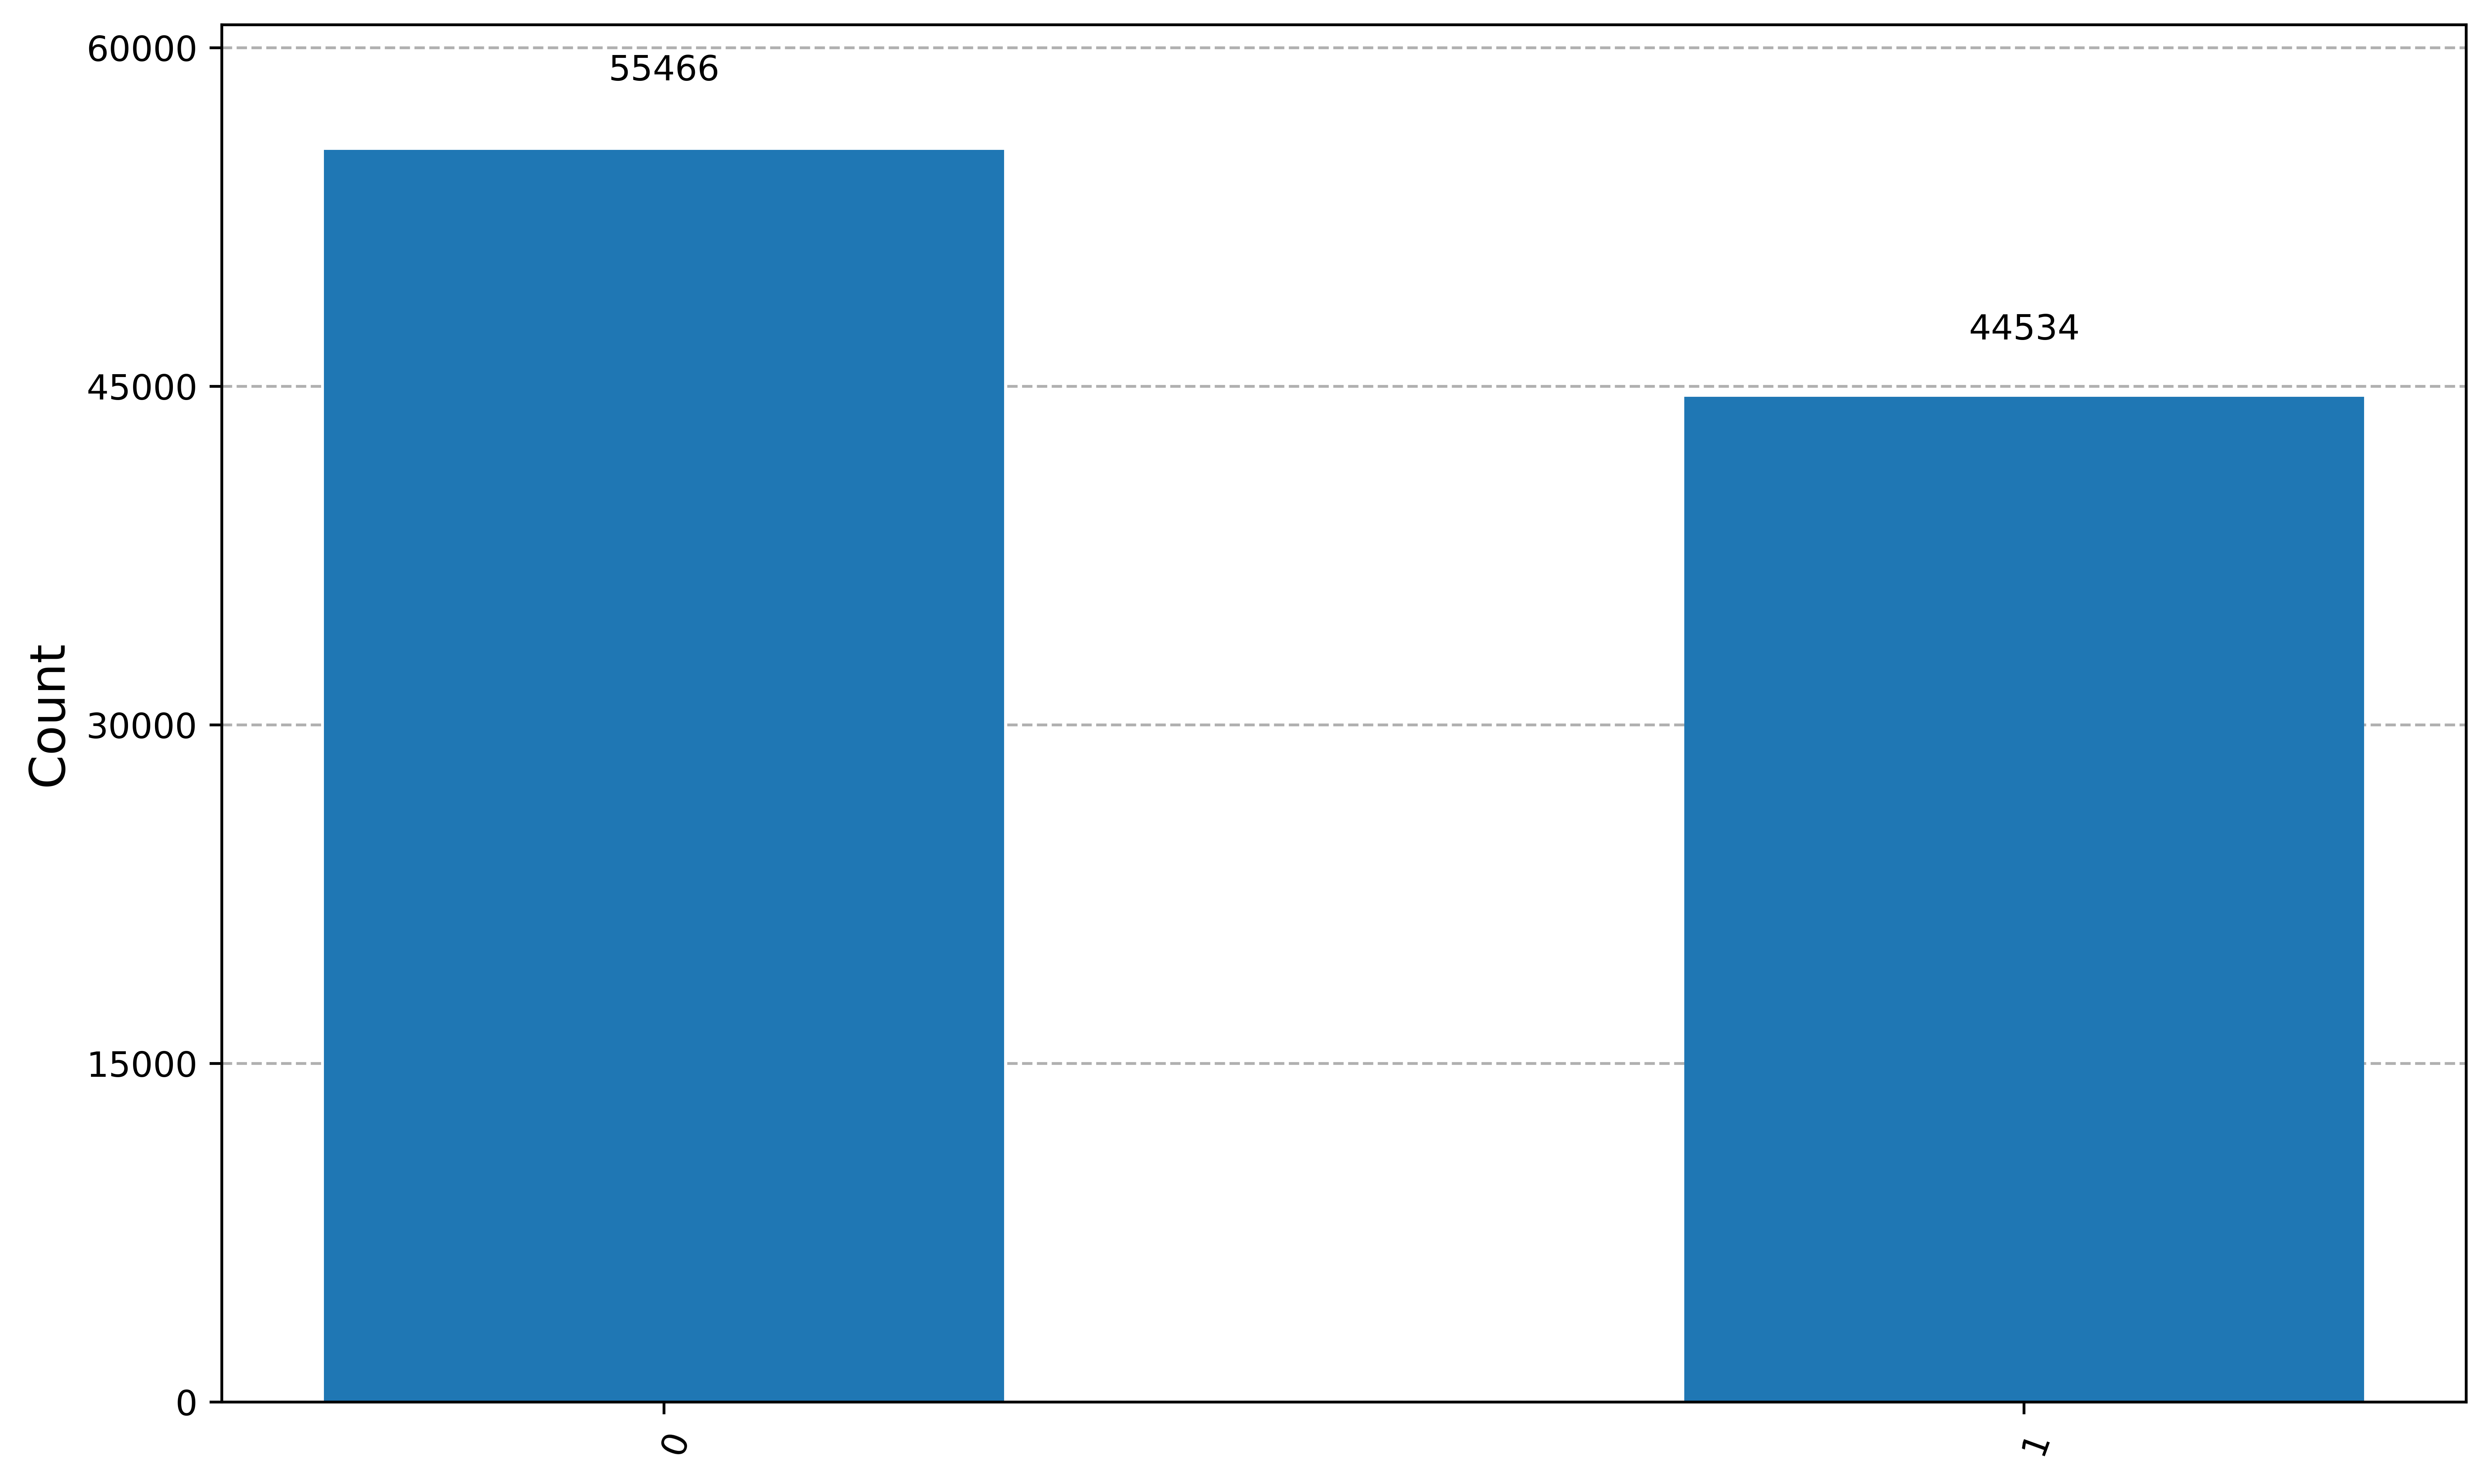

In [11]:
from qiskit.visualization import plot_histogram

statistics = psi_qiskit.sample_counts(100000)
print(statistics)
plot_histogram(statistics)

In [11]:
# Now we will implement some operations on the states (we will use y-pauli matrix, hadamard gate, some rotation pi/2 and pi/4)

from qiskit.quantum_info import Operator

Y = Operator([[0, -1j], [1j, 0]])
H = Operator([[1 / np.sqrt(2), 1 / np.sqrt(2)], [1 / np.sqrt(2), -1 / np.sqrt(2)]])
S = Operator([[1, 0], [0, 1j]])
T = Operator([[1, 0], [0, np.exp(1j * np.pi / 4)]])

display(array_to_latex(Y, prefix="Y = "))
display(array_to_latex(H, prefix="H = "))
display(array_to_latex(S, prefix="S = "))
display(array_to_latex(T, prefix="T = "))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [12]:
# To apply an unitary operation to a state we use the .evolve() method
v = Statevector(ket_0)


v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(H)
v = v.evolve(S)
v = v.evolve(Y)
display(v.draw("latex"))

<IPython.core.display.Latex object>

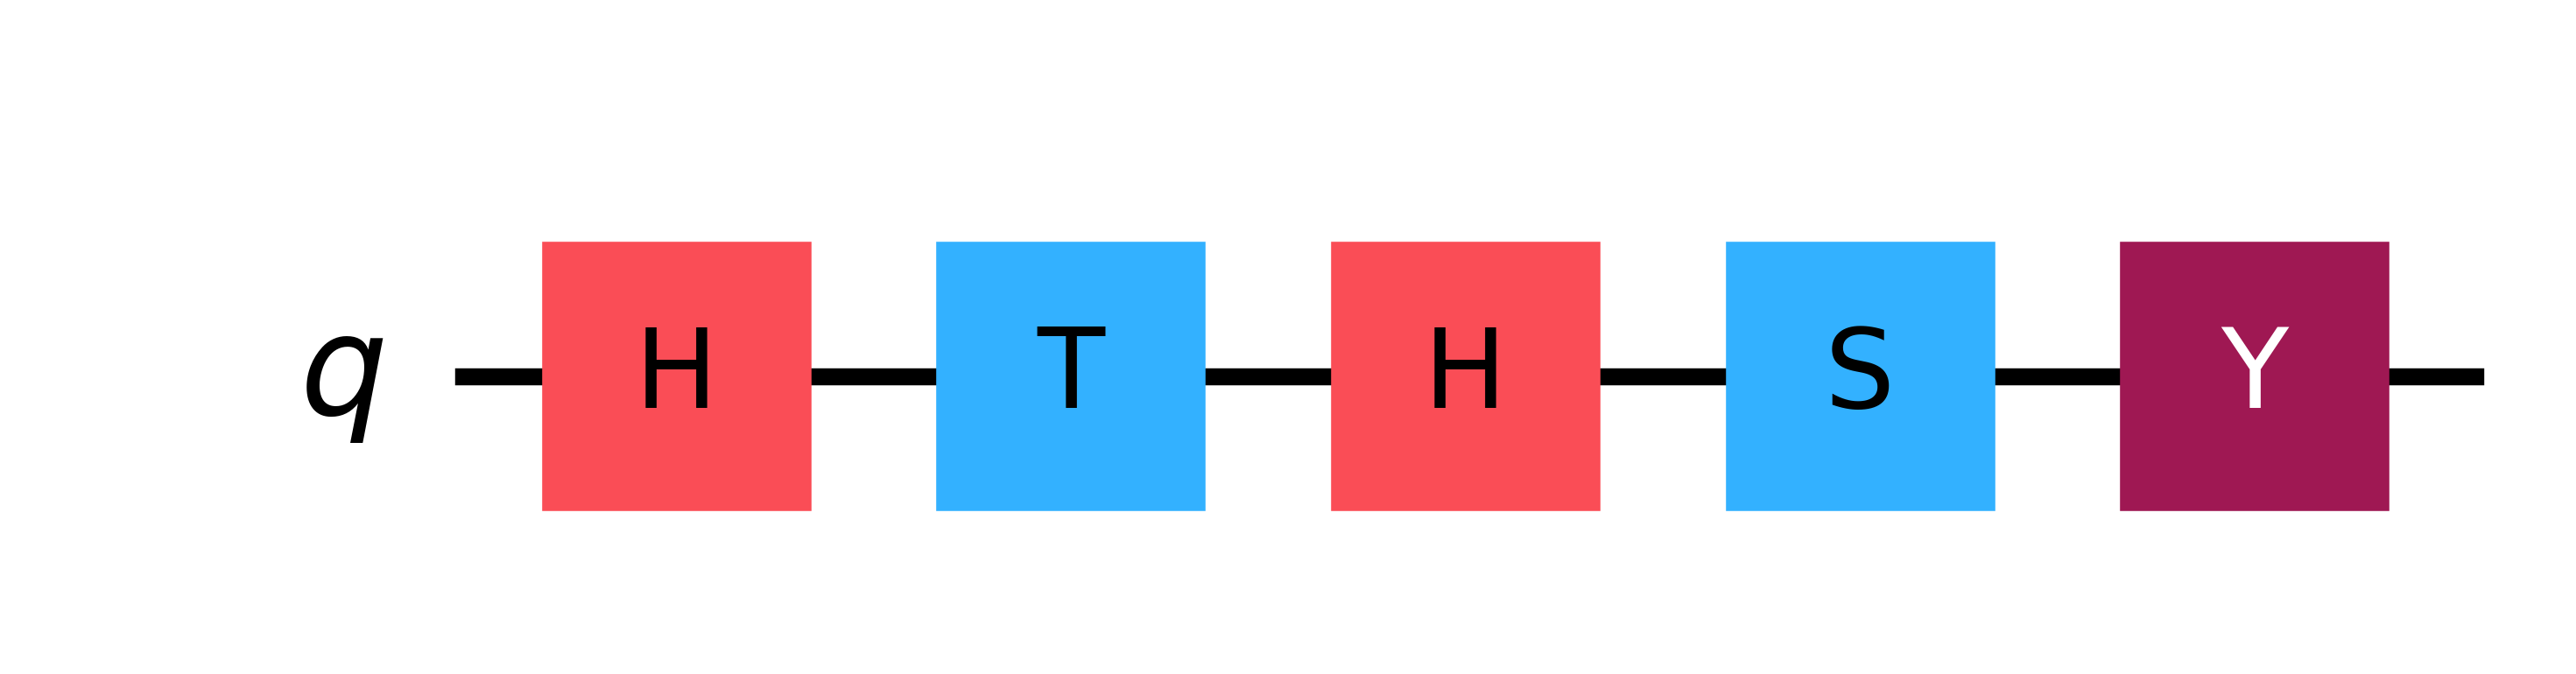

In [13]:
# Just showing how a quatum circuit would be implemented in qiskit
from qiskit import QuantumCircuit
 
circuit = QuantumCircuit(1)
 
circuit.h(0)
circuit.t(0)
circuit.h(0)
circuit.s(0)
circuit.y(0)
 
display(circuit.draw(output="mpl"))

In [14]:
# To see the equivalent operator of the circuit we use Operator.from_circuit
U = Operator.from_circuit(circuit)
display(array_to_latex(U, prefix="U = "))

<IPython.core.display.Latex object>

In [15]:
# We can also apply the circuit to a state
v2 = Statevector(ket_0)
v2 = v2.evolve(circuit)
display(v2.draw("latex"))

<IPython.core.display.Latex object>

{np.str_('0'): np.int64(556), np.str_('1'): np.int64(3444)}


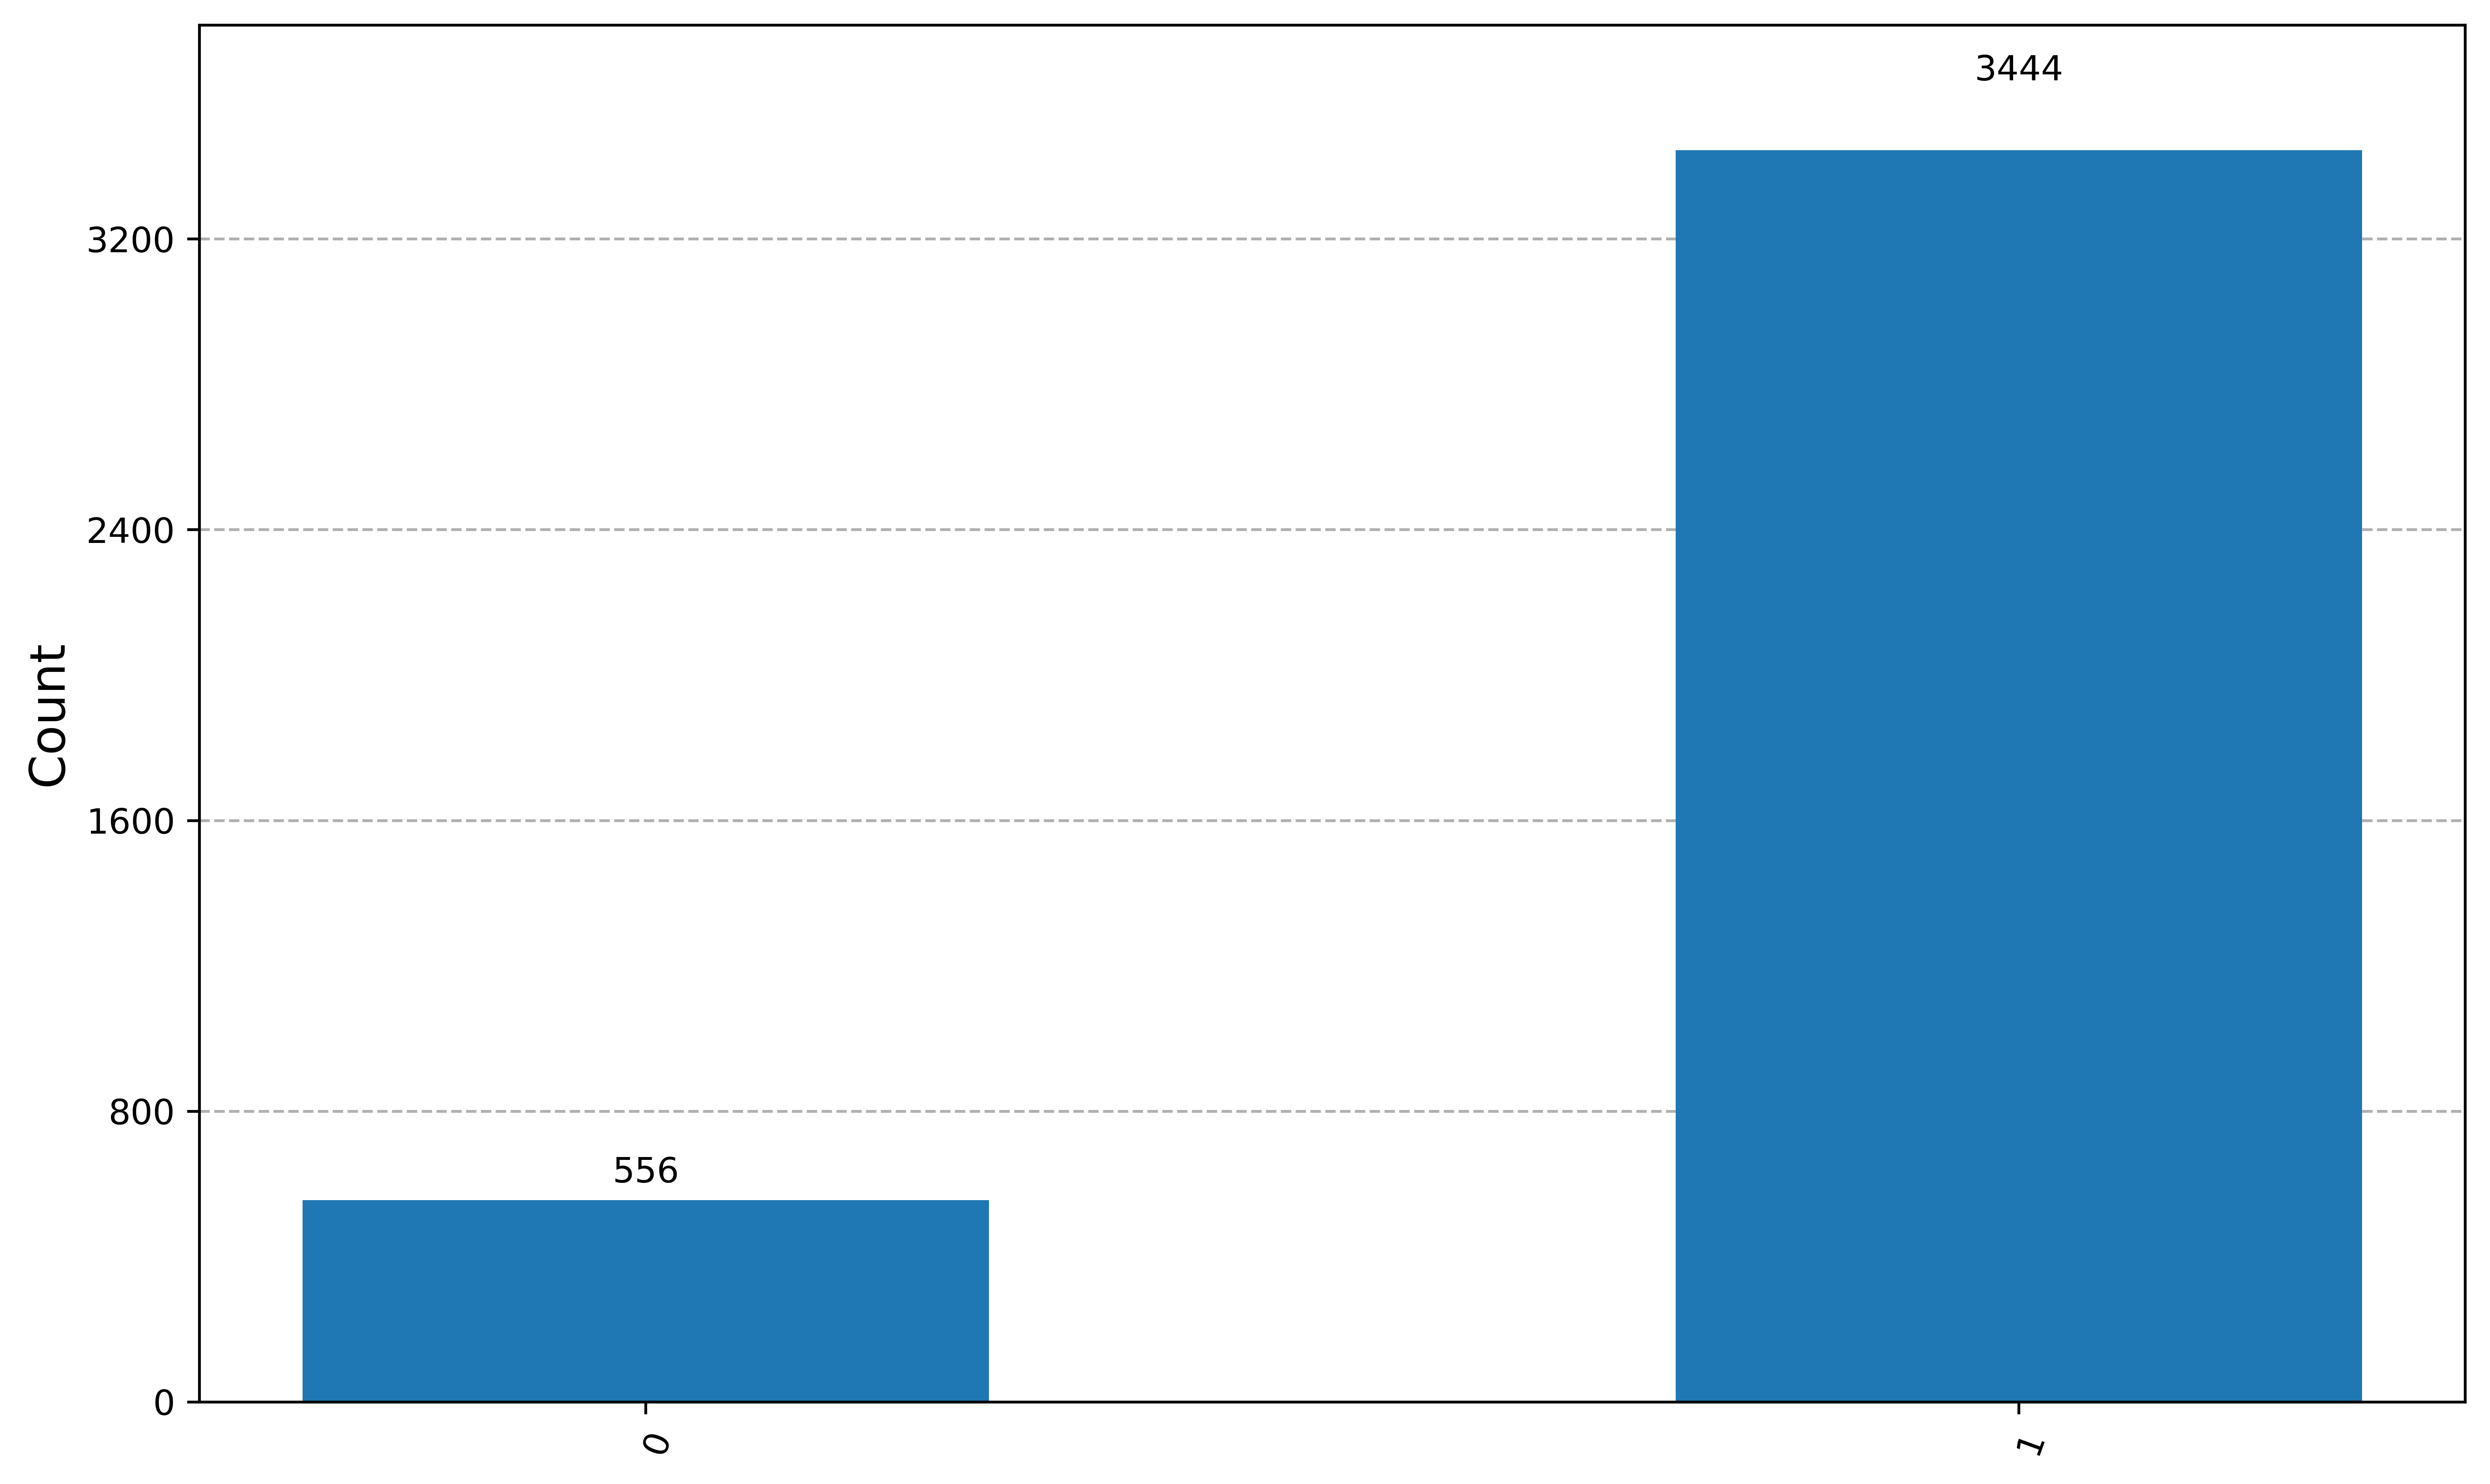

In [16]:
# Once again we can simulate a measurement
statistics2 = v2.sample_counts(4000)
print(statistics2)
plot_histogram(statistics2)